In [1]:
from ipynb.fs.full.data_cleaning import df, serviceDf
import pandas as pd
import numpy as np
from numpy import NaN
import matplotlib
import matplotlib.pyplot as plt

df.sample(3)

,Segments,Services,Type,Service,Hires,Price,Price Type,Rating,Zip Code,Capital City,State,Abbreviation,Implied Revenue
62401,Home Improvement,Roof Repair or Maintenance,Main,Monty construction corporation,3.00,NaN,,5.00,2201,Boston,Massachusetts,MA,NaN
82433,Home Improvement,Commercial Cleaning,Peripheral,Equal Quality LLC,NaN,NaN,,5.00,64105,Kansas City,Missouri,MO,NaN
39744,Home Improvement,Carpet Cleaning,Peripheral,ABC Carpet & Upholstery Cleaning,185.00,NaN,,5.00,68102,Omaha,Nebraska,NE,NaN


In [2]:
df.shape

(19091, 13)

**General quetions:**
1. Which segments is Thumbtack focusing on? Or is Thumbtack consistent in all segments & services?
2. Does the demand & supply in services change from a region to another?
3. Which segments are doing better or worse?
4. Is Thumbtack offering this many services because they have a low # hires/# sellers rate?
5. Are there any segments or services that showcase more uncaptured potential?
6. What types of sellers are the most successful? Individuals or business? Does it depend on the type of service and/or region?

# Which segments is Thumbtack focusing on?

## Count by Segment

We can first see a basic count of services for each segment.

In [3]:
# See ranking by count
segmentCount = df.groupby("Segments")["Segments"].count()
dfSegmentCount = segmentCount.to_frame(name="Count").reset_index()
dfSegmentCount["Contribution"] = dfSegmentCount["Count"] / dfSegmentCount["Count"].sum()
dfSegmentCount.sort_values(by="Count", ascending=False)

,Segments,Count,Contribution
2,Home Improvement,10730,0.56
1,Events,3486,0.18
5,Wellness,1595,0.08
3,Lessons,1493,0.08
0,Business,1254,0.07
4,Pets,533,0.03


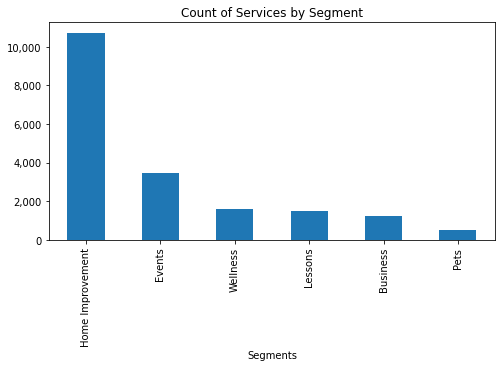

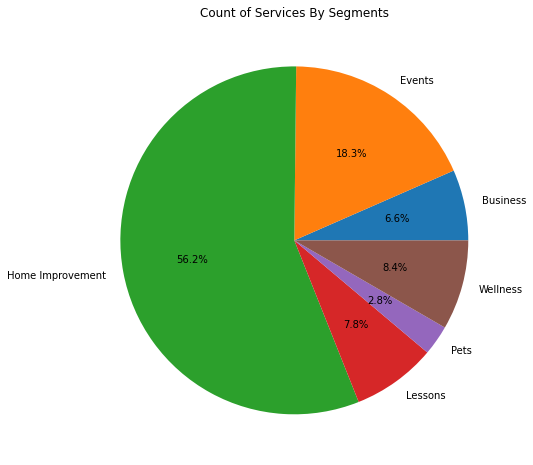

In [4]:
segmentCount.sort_values(ascending=False).plot.bar(
    title="Count of Services by Segment", figsize=(8, 4)
)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(["{:,.0f}".format(x) for x in current_values])
plt.show()

segmentCount.plot.pie(
    autopct="%.1f%%",
    title="Count of Services By Segments",
    y="Count",
    ylabel="",
    figsize=(8, 8),
)
plt.show()

## Count by Services

This is to see the counts for specific services like DJ, massage therapy, etc.

In [5]:
# See ranking by count
servicesCount = df.groupby("Services")["Services"].count()
dfServicesCount = servicesCount.to_frame(name="Count").reset_index()
dfServicesCount["Contribution"] = (
    dfServicesCount["Count"] / dfServicesCount["Count"].sum()
)
dfServicesCount.sort_values(by="Count", ascending=False)[:19]

,Services,Count,Contribution
99,Wedding Officiant,839,0.04
33,Commercial Cleaning,832,0.04
1,Accounting,791,0.04
31,Closet and Shelving System Installation,755,0.04
101,Wedding and Event Makeup,712,0.04
69,Massage Therapy,697,0.04
44,DJ,684,0.04
65,Interior Design,627,0.03
84,Roof Repair or Maintenance,512,0.03
100,Wedding and Event Catering,504,0.03


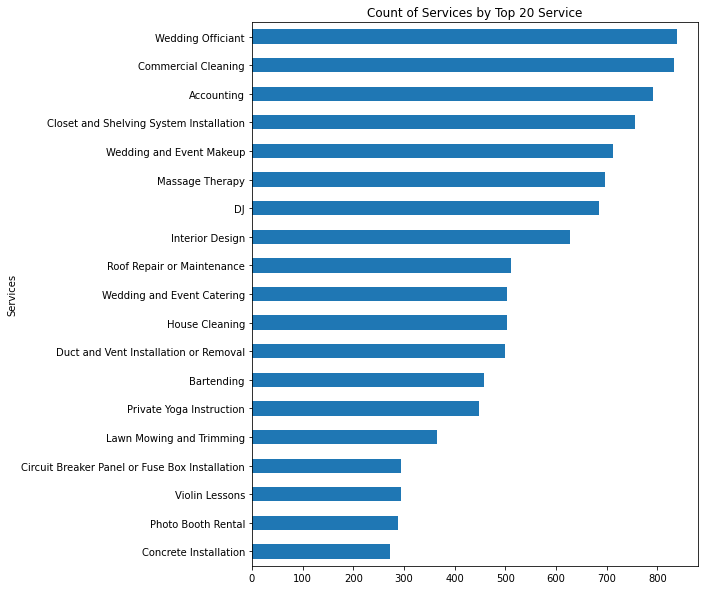

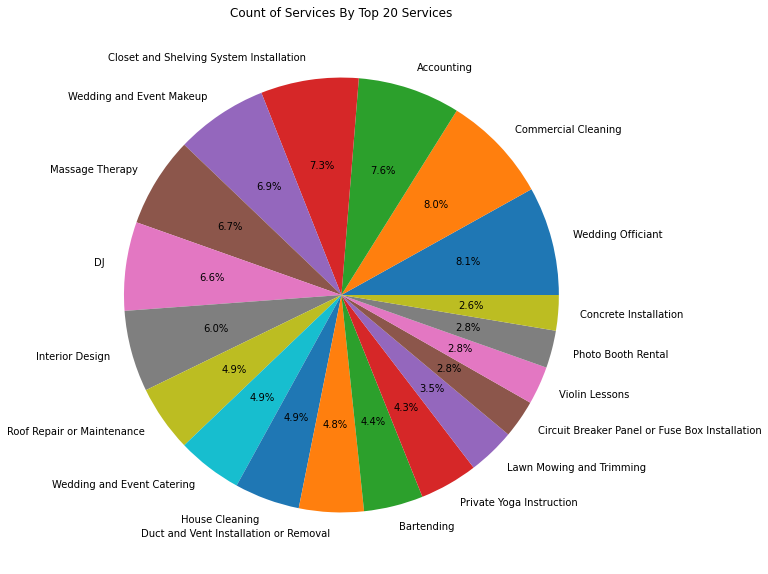

In [6]:
servicesCountChart = servicesCount.sort_values(ascending=False)[:19]
servicesCountChart.sort_values(ascending=True).plot.barh(
    title="Count of Services by Top 20 Service", xlabel="Services", figsize=(8, 10)
)
plt.show()

servicesCountChart.plot.pie(
    autopct="%.1f%%",
    title="Count of Services By Top 20 Services",
    y="Count",
    ylabel="",
    figsize=(10, 10),
)
plt.show()

# Does the demand & supply in services change from a region to another?

Outputs per regional segments & services:
- \# services
- \# hires
- \# hires/#services rate
- List of sellers per region

# Which segments are doing better or worse?

Maybe see implied revenue from these segments

In [7]:
# Get sum of implied revenue by segment
dfRevenuBySegment = (
    df.groupby("Segments")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuBySegment["Contribution"] = (
    dfRevenuBySegment["Implied Revenue"] / dfRevenuBySegment["Implied Revenue"].sum()
)

# Get sum of implied revenue by services
dfRevenuByServices = (
    df.groupby("Services")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuByServices["Contribution"] = (
    dfRevenuByServices["Implied Revenue"] / dfRevenuByServices["Implied Revenue"].sum()
)

# Get sum of implied revenue by states
dfRevenuByRevenue = (
    df.groupby("State")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuByRevenue["Contribution"] = (
    dfRevenuByRevenue["Implied Revenue"] / dfRevenuByRevenue["Implied Revenue"].sum()
)

In [8]:
# See implied revenue by segment
dfRevenuBySegment.sort_values(by="Contribution", ascending=False)

,Segments,Implied Revenue,Contribution
2,Home Improvement,"25,848,627.00",0.45
1,Events,"21,770,915.00",0.38
0,Business,"4,122,263.00",0.07
5,Wellness,"3,562,406.00",0.06
3,Lessons,"2,172,309.00",0.04
4,Pets,"304,754.00",0.01


In [9]:
# See top 10 implied revenue by services
dfRevenuByServices.sort_values(by="Contribution", ascending=False)[:9]

,Services,Implied Revenue,Contribution
99,Wedding Officiant,"9,046,401.00",0.16
44,DJ,"5,589,660.00",0.10
74,Photo Booth Rental,"3,617,129.00",0.06
14,Bed Bug Extermination,"3,336,025.00",0.06
32,Commercial Carpet Cleaning,"3,151,828.00",0.05
33,Commercial Cleaning,"2,400,480.00",0.04
69,Massage Therapy,"2,149,258.00",0.04
101,Wedding and Event Makeup,"1,802,999.00",0.03
64,House Cleaning,"1,531,810.00",0.03


In [10]:
# See top 10 implied revenue by zipcode
dfRevenuByRevenue.sort_values(by="Contribution", ascending=False)[:9]

,State,Implied Revenue,Contribution
4,California,"8,155,593.00",0.14
43,Texas,"5,813,438.00",0.10
9,Florida,"3,806,216.00",0.07
30,New Jersey,"2,692,872.00",0.05
32,New York,"2,375,215.00",0.04
10,Georgia,"2,167,083.00",0.04
5,Colorado,"2,036,329.00",0.04
25,Missouri,"1,974,379.00",0.03
33,North Carolina,"1,937,061.00",0.03


# Is Thumbtack offering this many services because they have a low #hires/#sellers rate?

## Hires by Segment

In [11]:
# See ranking by count
hiresCount = df.groupby("Segments")["Hires"].sum()
dfHiresCount = hiresCount.to_frame(name="Total Hires").reset_index()
dfHiresCount["Contribution"] = (
    dfHiresCount["Total Hires"] / dfHiresCount["Total Hires"].sum()
)
dfHiresCount.sort_values(by="Total Hires", ascending=False)

,Segments,Total Hires,Contribution
2,Home Improvement,"406,464.00",0.62
1,Events,"129,867.00",0.20
5,Wellness,"38,272.00",0.06
0,Business,"37,767.00",0.06
3,Lessons,"31,698.00",0.05
4,Pets,"12,814.00",0.02


### The Hires Ratio

The hires ratio is essentially the percentage of hires over the total number of listing available in that segment/services. This is to see which segment/services gets more customers than others. In other words, it would be a proxy for demand and supply.

In [12]:
# Merge count and hires
dfCountMerge = pd.merge(
    dfSegmentCount[["Segments", "Count"]],
    dfHiresCount[["Segments", "Total Hires"]],
    how="left",
    left_on="Segments",
    right_on="Segments",
)

dfCountMerge["Hire Ratio"] = dfCountMerge["Total Hires"] / dfCountMerge["Count"]
dfCountMerge.sort_values(by="Hire Ratio", ascending=False)

,Segments,Count,Total Hires,Hire Ratio
2,Home Improvement,10730,"406,464.00",37.88
1,Events,3486,"129,867.00",37.25
0,Business,1254,"37,767.00",30.12
4,Pets,533,"12,814.00",24.04
5,Wellness,1595,"38,272.00",23.99
3,Lessons,1493,"31,698.00",21.23


## Hires by Services

Look at the top 20.

In [13]:
# See ranking by count
hiresCountServices = df.groupby("Services")["Hires"].sum()
dfHiresCountServices = hiresCountServices.to_frame(name="Total Hires").reset_index()
dfHiresCountServices["Contribution"] = (
    dfHiresCountServices["Total Hires"] / dfHiresCountServices["Total Hires"].sum()
)

dfHiresCountServices = pd.merge(
    dfHiresCountServices,
    serviceDf[["Segments", "Services"]],
    on="Services",
    how="inner",
).drop_duplicates()

#### Top 20 Hires Count

In [14]:
dfHiresCountServices.sort_values(by="Segments", ascending=False)[:19]

,Services,Total Hires,Contribution,Segments
76,Private Pilates Instruction,555.00,0.00,Wellness
80,Private Yoga Instruction,"3,866.00",0.01,Wellness
67,Life Coaching,"1,163.00",0.00,Wellness
69,Massage Therapy,"22,022.00",0.03,Wellness
71,Nutritionist,"3,208.00",0.00,Wellness
72,Personal Training,"7,458.00",0.01,Wellness
73,Pet Sitting,"4,796.00",0.01,Pets
25,Cat Grooming,"3,754.00",0.01,Pets
50,Dog Walking,"2,864.00",0.00,Pets
5,Aquarium Services,"1,400.00",0.00,Pets


#### Bottom 20 Hires Count

In [15]:
dfHiresCountServices.sort_values(by="Total Hires", ascending=False)[-19:]

,Services,Total Hires,Contribution,Segments
47,Deck or Porch Repair,"1,092.00",0.00,Home Improvement
97,Voice Over Lessons,"1,010.00",0.00,Lessons
78,Private Swim Lessons,986.00,0.00,Lessons
86,Science Tutoring,913.00,0.00,Lessons
9,Asphalt Installation,905.00,0.00,Home Improvement
85,Saxophone Lessons,896.00,0.00,Lessons
8,Asbestos Removal,859.00,0.00,Home Improvement
19,Cabinet Refinishing and Repair,783.00,0.00,Home Improvement
91,Social Sciences Tutoring,731.00,0.00,Lessons
94,Statistical Data Analysis,644.00,0.00,Business


### The Hires Ratio

In [16]:
# Merge count and hires
dfCountMergeServices = pd.merge(
    dfServicesCount[["Services", "Count"]],
    dfHiresCountServices[["Services", "Total Hires"]],
    how="left",
    left_on="Services",
    right_on="Services",
)

dfCountMergeServices["Hire Ratio"] = (
    dfCountMergeServices["Total Hires"] / dfCountMergeServices["Count"]
)

dfCountMergeServices = pd.merge(
    dfCountMergeServices.drop_duplicates(),
    serviceDf[["Segments", "Services"]].drop_duplicates(),
    on="Services",
    how="inner",
).drop_duplicates()

dfCountMergeServices = dfCountMergeServices[
    ~dfCountMergeServices.duplicated("Services", keep="first")
]

#### Top 20 Hires Ratio

In [17]:
dfCountMergeServices.sort_values(by="Hire Ratio", ascending=False)[:19]

,Services,Count,Total Hires,Hire Ratio,Segments
4,Appliance Repair or Maintenance,90,"10,775.00",119.72,Home Improvement
24,Carpet Repair or Partial Replacement,49,"5,564.00",113.55,Home Improvement
49,Dishwasher Installation,89,"9,956.00",111.87,Home Improvement
32,Commercial Carpet Cleaning,197,"21,348.00",108.37,Home Improvement
68,Logo Design,52,"5,573.00",107.17,Business
21,Carpet Cleaning,236,"23,342.00",98.91,Home Improvement
3,Appliance Installation,109,"10,441.00",95.79,Home Improvement
95,Test Prep Services,33,"2,998.00",90.85,Lessons
25,Cat Grooming,44,"3,754.00",85.32,Pets
63,Handyman,205,"15,457.00",75.40,Home Improvement


#### Bottom 20 Hires Ratio

In [18]:
dfCountMergeServices.sort_values(by="Hire Ratio", ascending=False)[-19:]

,Services,Count,Total Hires,Hire Ratio,Segments
88,Sign Language Lessons,4,65.00,16.25,Lessons
50,Dog Walking,187,"2,864.00",15.32,Pets
62,General Contracting,242,"3,119.00",12.89,Home Improvement
1,Accounting,791,"10,069.00",12.73,Business
12,Basement Finishing or Remodeling,153,"1,909.00",12.48,Home Improvement
9,Asphalt Installation,73,905.00,12.40,Home Improvement
87,Sewing Lessons,44,520.00,11.82,Lessons
10,Asphalt Repair and Maintenance,107,"1,208.00",11.29,Home Improvement
6,Architectural Services,125,"1,315.00",10.52,Home Improvement
38,Construction Services,128,"1,338.00",10.45,Home Improvement


### Scatter of Count and Number of Hires

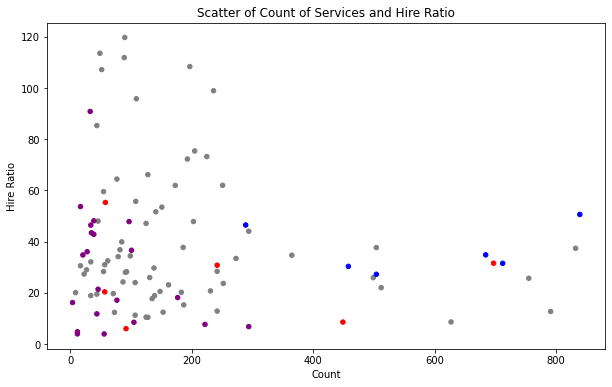

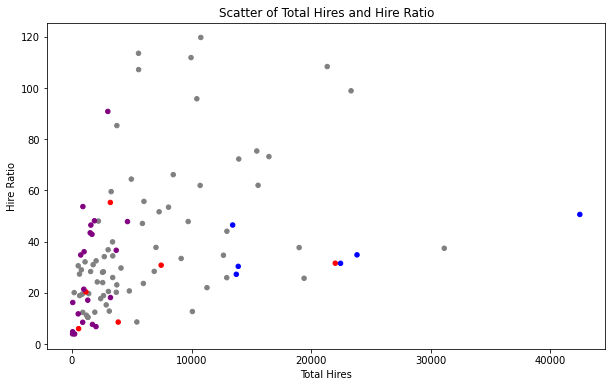

In [19]:
colors = {
    "Home Improvement": "gray",
    "Business": "gray",
    "Pets": "gray",
    "Events": "blue",
    "Wellness": "red",
    "Lessons": "purple",
}

dfCountMergeServices.plot.scatter(
    title="Scatter of Count of Services and Hire Ratio",
    x="Count",
    y="Hire Ratio",
    figsize=(10, 6),
    c=dfCountMergeServices["Segments"].map(colors),
)
plt.show()

dfCountMergeServices.plot.scatter(
    title="Scatter of Total Hires and Hire Ratio",
    x="Total Hires",
    y="Hire Ratio",
    figsize=(10, 6),
    c=dfCountMergeServices["Segments"].map(colors),
)
plt.show()

From the first scatterplot, it could mean that services with a higher count could mean that there is no clear indication of specialization. It could be that:
- There are too many services for customers to choose from, confusing them
- There are just a lot of competitors, so the sellers would have to share more

# Are there any segments or services that showcase more uncaptured potential?

# What types of sellers are the most successful? Individuals or business? Does it depend on the type of service and/or region?

In [20]:
hiresTopN = (
    df.groupby("Services")["Hires"]
    .nlargest(10)
    .sum(level=0)
    .to_frame(name="Top Hires")
    .reset_index()
)

dfHiresSkew = pd.merge(
    dfHiresCountServices[["Services", "Total Hires", "Segments"]],
    hiresTopN,
    on="Services",
)

dfHiresSkew = pd.merge(
    dfHiresSkew, dfServicesCount[["Services", "Count"]], on="Services"
)

dfHiresSkew["Skew"] = dfHiresSkew["Top Hires"] / dfHiresSkew["Total Hires"]
dfHiresSkew = dfHiresSkew[
    ["Segments", "Services", "Count", "Top Hires", "Total Hires", "Skew"]
]
dfHiresSkew.sort_values(by="Skew", ascending=False)[:20]

,Segments,Services,Count,Top Hires,Total Hires,Skew
0,Home Improvement,Above Ground Swimming Pool Installation,9,181.00,181.00,1.00
98,Lessons,Volleyball Lessons,12,58.00,58.00,1.00
88,Lessons,Sign Language Lessons,4,65.00,65.00,1.00
92,Lessons,Softball Lessons,12,48.00,48.00,1.00
61,Home Improvement,Engraving,17,514.00,520.00,0.99
94,Business,Statistical Data Analysis,34,618.00,644.00,0.96
86,Lessons,Science Tutoring,17,873.00,913.00,0.96
19,Home Improvement,Cabinet Refinishing and Repair,27,723.00,783.00,0.92
97,Lessons,Voice Over Lessons,28,919.00,"1,010.00",0.91
43,Home Improvement,Custom Furniture Building,23,569.00,629.00,0.90


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=656f0529-4f6c-416d-8f7f-fc1bd0174876' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>